In [5]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('data/mushrooms.csv')

In [6]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
data=[dataset]

In [9]:
poison_mapping = {"p": 0, "e": 1}
for feature in data:
    feature['class'] = feature['class'].map(poison_mapping)

In [10]:
data

[      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
 0         0         x           s         n       t    p               f   
 1         1         x           s         y       t    a               f   
 2         1         b           s         w       t    l               f   
 3         0         x           y         w       t    p               f   
 4         1         x           s         g       f    n               f   
 ...     ...       ...         ...       ...     ...  ...             ...   
 8119      1         k           s         n       f    n               a   
 8120      1         x           s         n       f    n               a   
 8121      1         f           s         n       f    n               a   
 8122      0         k           y         n       f    y               f   
 8123      1         x           s         n       f    n               a   
 
      gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
column_list = dataset.columns.values.tolist()
#print(column_list)
for column_name in column_list:
    print(column_name)
    print(dataset[column_name].unique())

class
[0 1]
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [13]:
x = dataset.iloc[:,1:].values
x

array([['x', 's', 'n', ..., 'k', 's', 'u'],
       ['x', 's', 'y', ..., 'n', 'n', 'g'],
       ['b', 's', 'w', ..., 'n', 'n', 'm'],
       ...,
       ['f', 's', 'n', ..., 'b', 'c', 'l'],
       ['k', 'y', 'n', ..., 'w', 'v', 'l'],
       ['x', 's', 'n', ..., 'o', 'c', 'l']], dtype=object)

In [14]:
y = dataset.iloc[:,0].values

In [15]:
def bar_chart(feature):
    poisonous = dataset[dataset['class']==0][feature].value_counts()
    edible = dataset[dataset['class']==1][feature].value_counts()
    df = pd.DataFrame([poisonous,edible])
    df.index = ['Poisonous','Edible']
    df.plot(kind='bar',stacked=True, figsize=(8,4))

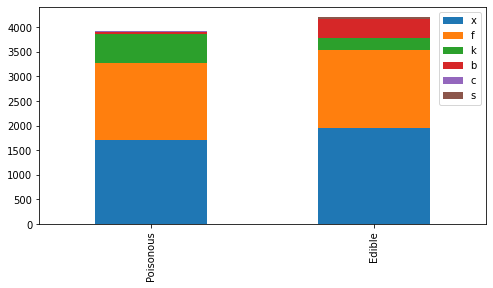

In [16]:
bar_chart('cap-shape')

In [21]:
#capshape_mapping = {"x": 3, "f": 3,"k":1,"b":1,"c":0.1,"s":0.1}
#for feature in data:
    #feature['cap-shape'] = feature['cap-shape'].map(capshape_mapping)

In [26]:
#labelencoder 써도됨
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#dataset['cap-shape'] = label.fit_transform(dataset['cap-shape'])
#label = LabelEncoder()


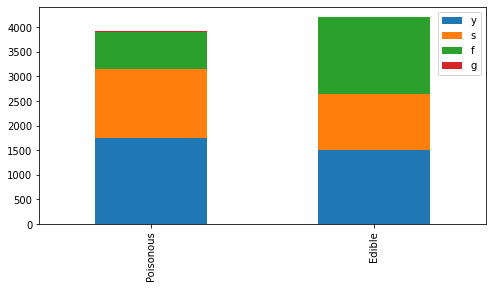

In [303]:
bar_chart('cap-surface')

In [304]:
capsurface_mapping = {"y":3,"s":2,"f":2,"g":0.1}
for feature in data:
    feature['cap-surface'] = feature['cap-surface'].map(capsurface_mapping)

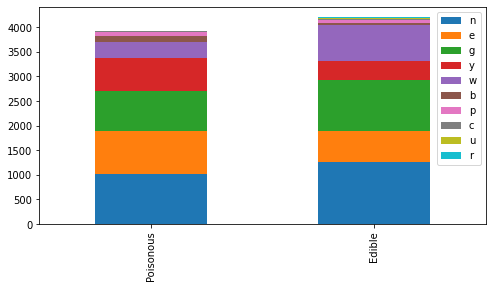

In [305]:
bar_chart('cap-color')

In [306]:
capcolor_mapping = {"n":2,"e":2,"g":2,"y":1,"w":1,"b":0.5,"p":0.5,"c":0.1,"u":0.1,"r":0.1}
for feature in data:
    feature['cap-color'] = feature['cap-color'].map(capcolor_mapping)

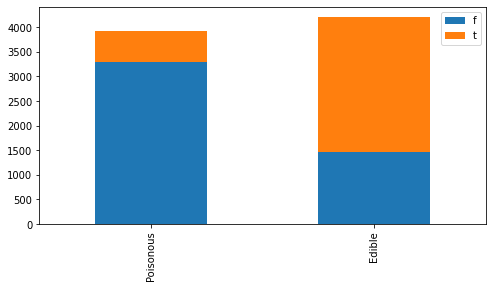

In [307]:
bar_chart('bruises')

In [308]:
bruises_mapping = {"f":4,"t":4}
for feature in data:
    feature['bruises'] = feature['bruises'].map(bruises_mapping)

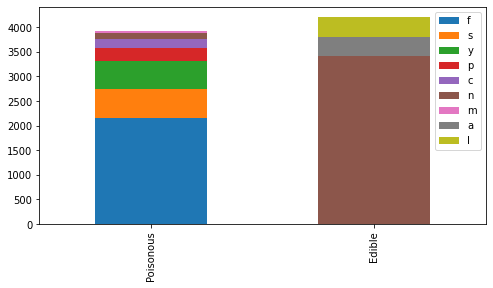

In [309]:
bar_chart('odor')

In [310]:
odor_mapping = {"f":3,"s":2,"y":2,"p":1,"c":1,"n":4,"m":0.1,"a":1,"l":1}
for feature in data:
    feature['odor'] = feature['odor'].map(odor_mapping)

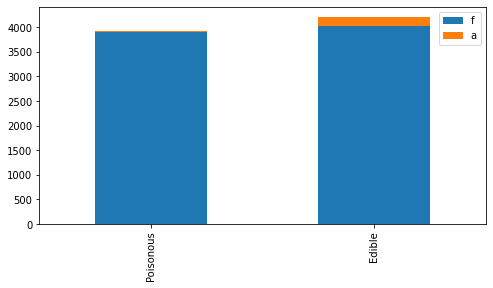

In [311]:
bar_chart('gill-attachment')

In [312]:
gillattachment_mapping = {"f":5,"a":0.5}
for feature in data:
    feature['gill-attachment'] = feature['gill-attachment'].map(gillattachment_mapping)

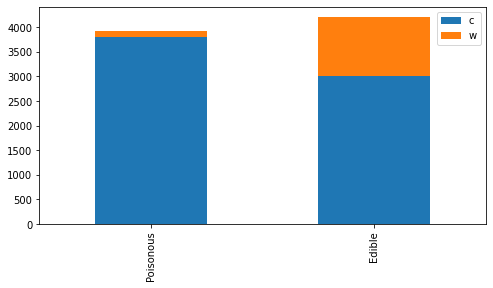

In [313]:
bar_chart('gill-spacing')

In [314]:
gillspacing_mapping = {"c":4,"w":2}
for feature in data:
    feature['gill-spacing'] = feature['gill-spacing'].map(gillspacing_mapping)

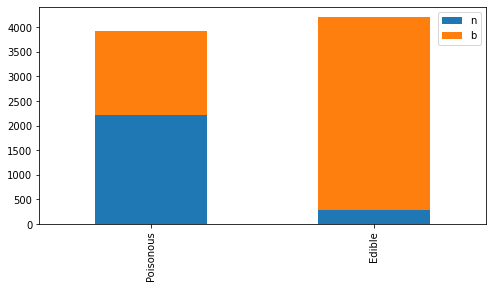

In [315]:
bar_chart('gill-size')

In [316]:
gillsize_mapping = {"n":2,"b":4}
for feature in data:
    feature['gill-size'] = feature['gill-size'].map(gillsize_mapping)

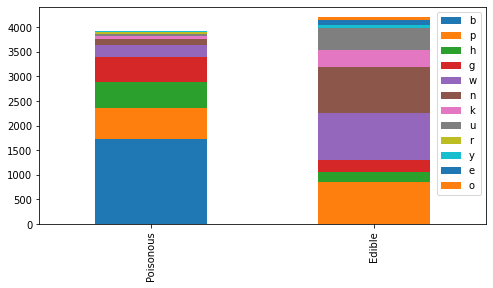

In [317]:
bar_chart('gill-color')

In [318]:
gillcolor_mapping = {"b":2,"p":2,"h":1,"g":1,"w":2,"n":2,"k":1,"u":1,"r":0.1,"y":0.1,"e":0.1,"o":0.1}
for feature in data:
    feature['gill-color'] = feature['gill-color'].map(gillcolor_mapping)

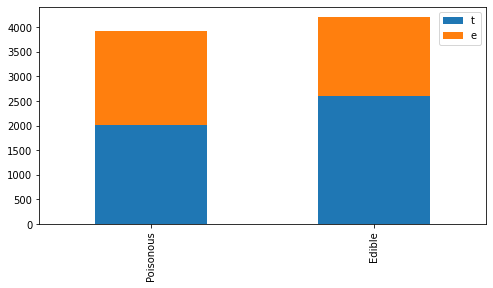

In [319]:
bar_chart('stalk-shape')

In [320]:
stalkshape_mapping = {"t":3,"e":3}
for feature in data:
    feature['stalk-shape'] = feature['stalk-shape'].map(stalkshape_mapping)

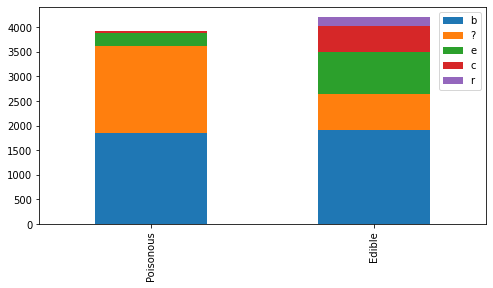

In [321]:
bar_chart('stalk-root')

In [322]:
stalkroot_mapping = {"b":3,"?":0,"e":2,"c":1,"r":0.5}
for feature in data:
    feature['stalk-root'] = feature['stalk-root'].map(stalkroot_mapping)

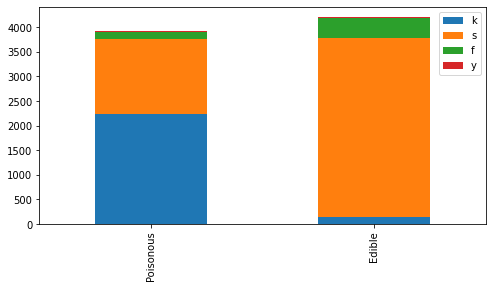

In [323]:
bar_chart('stalk-surface-above-ring')

In [324]:
stalksurfaceabovering_mapping = {"k":3,"s":3,"f":1,"y":0.1}
for feature in data:
    feature['stalk-surface-above-ring'] = feature['stalk-surface-above-ring'].map(stalksurfaceabovering_mapping)

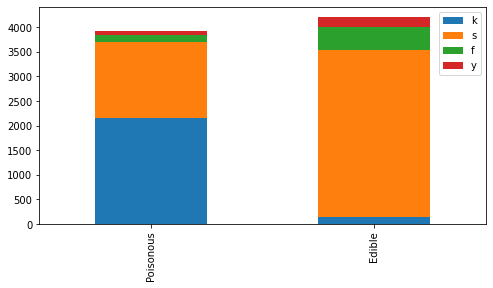

In [325]:
bar_chart('stalk-surface-below-ring')

In [326]:
stalksurfacebelowring_mapping = {"k":3,"s":3,"f":1,"y":0.1}
for feature in data:
    feature['stalk-surface-below-ring'] = feature['stalk-surface-below-ring'].map(stalksurfacebelowring_mapping)

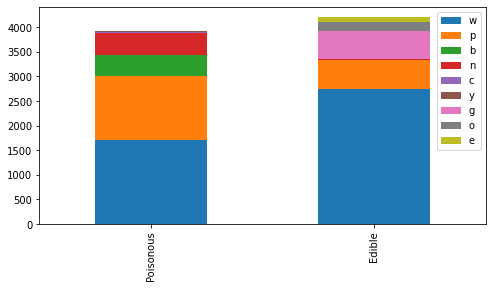

In [327]:
bar_chart('stalk-color-above-ring')

In [328]:
stalkcolorabovering_mapping = {"w":3,"p":2,"b":1,"n":1,"c":0.1,"y":0.1,"g":1,"o":0.5,"e":0.1}
for feature in data:
    feature['stalk-color-above-ring'] = feature['stalk-color-above-ring'].map(stalkcolorabovering_mapping)

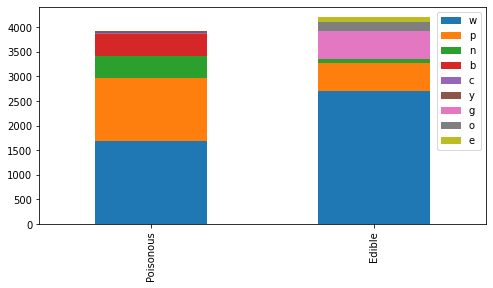

In [329]:
bar_chart('stalk-color-below-ring')

In [330]:
stalkcolorbelowring_mapping = {"w":3,"p":2,"b":1,"n":1,"c":0.1,"y":0.1,"g":1,"o":0.5,"e":0.1}
for feature in data:
    feature['stalk-color-below-ring'] = feature['stalk-color-below-ring'].map(stalkcolorbelowring_mapping)

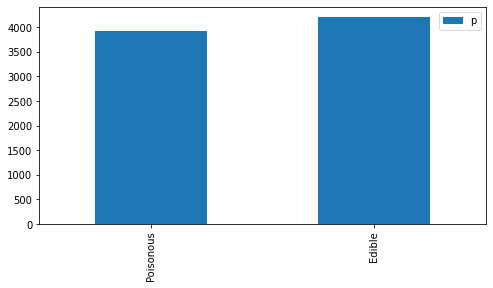

In [331]:
bar_chart('veil-type')

In [332]:
veiltype_mapping = {"p":1}
for feature in data:
    feature['veil-type'] = feature['veil-type'].map(veiltype_mapping)

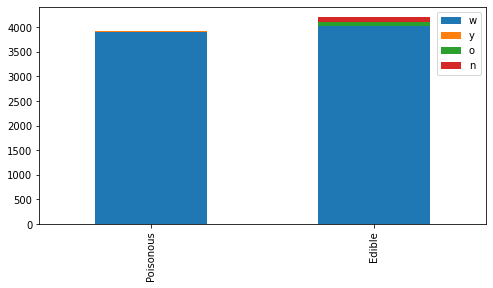

In [333]:
bar_chart('veil-color')

In [334]:
veilcolor_mapping = {"w":5,"y":0.1,"o":0.1,"n":0.1}
for feature in data:
    feature['veil-color'] = feature['veil-color'].map(veilcolor_mapping)

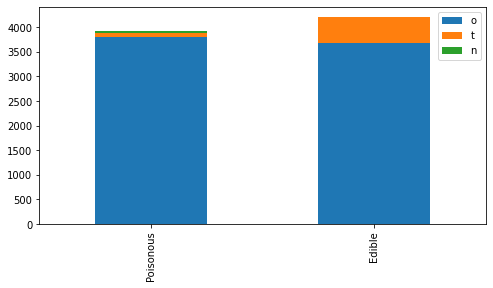

In [335]:
bar_chart('ring-number')

In [336]:
ringnumber_mapping = {"o":5,"t":1,"n":0.1}
for feature in data:
    feature['ring-number'] = feature['ring-number'].map(ringnumber_mapping)

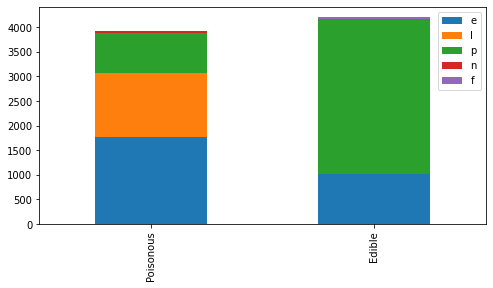

In [337]:
bar_chart('ring-type')

In [338]:
ringtype_mapping = {"e":2,"l":1,"p":3,"n":0.1,"f":0.1}
for feature in data:
    feature['ring-type'] = feature['ring-type'].map(ringtype_mapping)

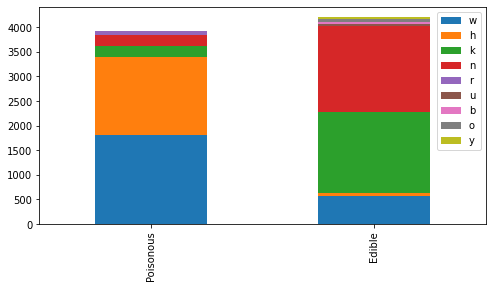

In [339]:
bar_chart('spore-print-color')

In [340]:
sporeprintcolor_mapping = {"w":2,"h":2,"k":2,"n":2,"r":0.1,"u":0.1,"b":0.1,"o":0.1,"y":0.1}
for feature in data:
    feature['spore-print-color'] = feature['spore-print-color'].map(sporeprintcolor_mapping)

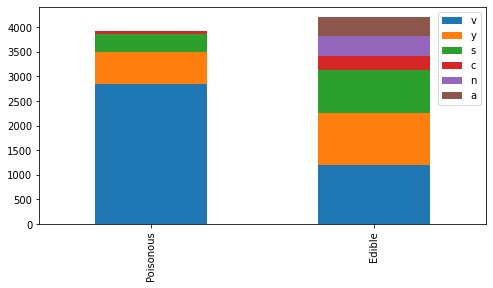

In [341]:
bar_chart('population')

In [342]:
population_mapping = {"v":2,"y":2,"s":2,"c":1,"n":1,"a":1}
for feature in data:
    feature['population'] = feature['population'].map(population_mapping)

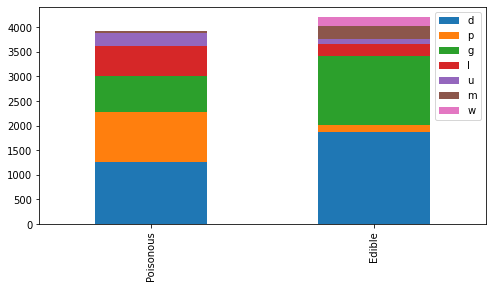

In [343]:
bar_chart('habitat')

In [344]:
habitat_mapping = {"d":2,"p":1,"g":2,"l":1,"u":0.5,"m":0.5,"w":0.1}
for feature in data:
    feature['habitat'] = feature['habitat'].map(habitat_mapping)

In [345]:
data

[      class  cap-shape  cap-surface  cap-color  bruises  odor  \
 0         0        3.0          2.0        2.0        4   1.0   
 1         1        3.0          2.0        1.0        4   1.0   
 2         1        1.0          2.0        1.0        4   1.0   
 3         0        3.0          3.0        1.0        4   1.0   
 4         1        3.0          2.0        2.0        4   4.0   
 ...     ...        ...          ...        ...      ...   ...   
 8119      1        1.0          2.0        2.0        4   4.0   
 8120      1        3.0          2.0        2.0        4   4.0   
 8121      1        3.0          2.0        2.0        4   4.0   
 8122      0        1.0          3.0        2.0        4   2.0   
 8123      1        3.0          2.0        2.0        4   4.0   
 
       gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 0                 5.0             4          2         1.0  ...   
 1                 5.0             4          4         1.0  ...   
 2

In [346]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3.0,2.0,2.0,4,1.0,5.0,4,2,1.0,...,3.0,3.0,3.0,1,5.0,5.0,3.0,2.0,2,0.5
1,1,3.0,2.0,1.0,4,1.0,5.0,4,4,1.0,...,3.0,3.0,3.0,1,5.0,5.0,3.0,2.0,1,2.0
2,1,1.0,2.0,1.0,4,1.0,5.0,4,4,2.0,...,3.0,3.0,3.0,1,5.0,5.0,3.0,2.0,1,0.5
3,0,3.0,3.0,1.0,4,1.0,5.0,4,2,2.0,...,3.0,3.0,3.0,1,5.0,5.0,3.0,2.0,2,0.5
4,1,3.0,2.0,2.0,4,4.0,5.0,2,4,1.0,...,3.0,3.0,3.0,1,5.0,5.0,2.0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,1.0,2.0,2.0,4,4.0,0.5,4,4,0.1,...,3.0,0.5,0.5,1,0.1,5.0,3.0,0.1,1,1.0
8120,1,3.0,2.0,2.0,4,4.0,0.5,4,4,0.1,...,3.0,0.5,0.5,1,0.1,5.0,3.0,0.1,2,1.0
8121,1,3.0,2.0,2.0,4,4.0,0.5,4,4,2.0,...,3.0,0.5,0.5,1,0.1,5.0,3.0,0.1,1,1.0
8122,0,1.0,3.0,2.0,4,2.0,5.0,4,2,2.0,...,3.0,3.0,3.0,1,5.0,5.0,2.0,2.0,2,1.0


In [206]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder()
#x = onehotencoder.fit_transform(x).toarray()

In [379]:
x_std=dataset.iloc[:,1:].values
x_std

array([[3. , 2. , 2. , ..., 2. , 2. , 0.5],
       [3. , 2. , 1. , ..., 2. , 1. , 2. ],
       [1. , 2. , 1. , ..., 2. , 1. , 0.5],
       ...,
       [3. , 2. , 2. , ..., 0.1, 1. , 1. ],
       [1. , 3. , 2. , ..., 2. , 2. , 1. ],
       [3. , 2. , 2. , ..., 0.1, 1. , 1. ]])

In [380]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state=0)

In [381]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6499, 22), (6499,), (1625, 22), (1625,))

In [382]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import binary_crossentropy
import matplotlib.pyplot as plt

In [383]:
model=Sequential()
model.add(Dense(1,input_shape=(x_train.shape[1],),activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [384]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 23        
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [385]:
hist=model.fit(x_train,y_train,epochs=100,validation_split=0.2,verbose=2)

Train on 5199 samples, validate on 1300 samples
Epoch 1/100
5199/5199 - 1s - loss: 0.6866 - accuracy: 0.6097 - val_loss: 0.4956 - val_accuracy: 0.8208
Epoch 2/100
5199/5199 - 0s - loss: 0.4343 - accuracy: 0.8684 - val_loss: 0.3879 - val_accuracy: 0.9008
Epoch 3/100
5199/5199 - 0s - loss: 0.3647 - accuracy: 0.9069 - val_loss: 0.3430 - val_accuracy: 0.9108
Epoch 4/100
5199/5199 - 0s - loss: 0.3292 - accuracy: 0.9138 - val_loss: 0.3162 - val_accuracy: 0.9115
Epoch 5/100
5199/5199 - 0s - loss: 0.3080 - accuracy: 0.9152 - val_loss: 0.3035 - val_accuracy: 0.9154
Epoch 6/100
5199/5199 - 0s - loss: 0.2930 - accuracy: 0.9163 - val_loss: 0.2899 - val_accuracy: 0.9162
Epoch 7/100
5199/5199 - 0s - loss: 0.2813 - accuracy: 0.9190 - val_loss: 0.2907 - val_accuracy: 0.9192
Epoch 8/100
5199/5199 - 0s - loss: 0.2724 - accuracy: 0.9196 - val_loss: 0.2725 - val_accuracy: 0.9162
Epoch 9/100
5199/5199 - 0s - loss: 0.2646 - accuracy: 0.9200 - val_loss: 0.2639 - val_accuracy: 0.9162
Epoch 10/100
5199/5199 - 

Epoch 80/100
5199/5199 - 0s - loss: 0.1747 - accuracy: 0.9373 - val_loss: 0.1712 - val_accuracy: 0.9408
Epoch 81/100
5199/5199 - 0s - loss: 0.1745 - accuracy: 0.9359 - val_loss: 0.1710 - val_accuracy: 0.9408
Epoch 82/100
5199/5199 - 0s - loss: 0.1742 - accuracy: 0.9354 - val_loss: 0.1744 - val_accuracy: 0.9277
Epoch 83/100
5199/5199 - 0s - loss: 0.1744 - accuracy: 0.9334 - val_loss: 0.1706 - val_accuracy: 0.9438
Epoch 84/100
5199/5199 - 0s - loss: 0.1738 - accuracy: 0.9375 - val_loss: 0.1704 - val_accuracy: 0.9408
Epoch 85/100
5199/5199 - 0s - loss: 0.1732 - accuracy: 0.9346 - val_loss: 0.1701 - val_accuracy: 0.9408
Epoch 86/100
5199/5199 - 0s - loss: 0.1734 - accuracy: 0.9377 - val_loss: 0.1712 - val_accuracy: 0.9392
Epoch 87/100
5199/5199 - 0s - loss: 0.1732 - accuracy: 0.9365 - val_loss: 0.1700 - val_accuracy: 0.9446
Epoch 88/100
5199/5199 - 0s - loss: 0.1726 - accuracy: 0.9365 - val_loss: 0.1786 - val_accuracy: 0.9185
Epoch 89/100
5199/5199 - 0s - loss: 0.1727 - accuracy: 0.9369 - 

In [386]:
model.predict(x_test)

array([[0.01706395],
       [0.96523654],
       [0.93150115],
       ...,
       [0.14687586],
       [0.8840755 ],
       [0.9614888 ]], dtype=float32)

In [387]:
model.evaluate(x_test,y_test)

1625/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1633402742101596, 0.93538463]

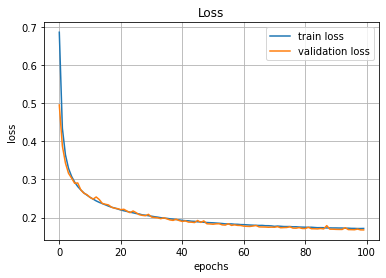

In [388]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

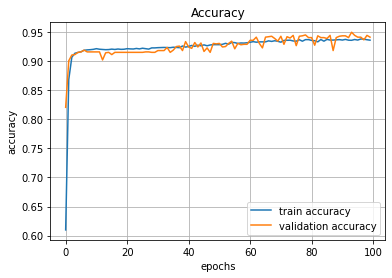

In [389]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [390]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [391]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

knn

In [392]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.99538462 0.99076923 0.99384615 0.99692308 0.99230769 0.99076923
 0.99538462 0.99846154 0.99076923 0.99845917]


99.43

Decision Tree

In [393]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.99692308 0.99384615 0.99846154 0.99846154 0.99846154 0.99692308
 0.99692308 1.         0.99692308 1.        ]


99.77

Random Forest

In [394]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.99692308 0.99384615 0.99846154 0.99846154 0.99846154 0.99692308
 0.99692308 1.         0.99692308 1.        ]


99.77

Naive Bayes

In [395]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.72       0.66769231 0.69846154 0.69692308 0.66       0.69384615
 0.68307692 0.68769231 0.68307692 0.70107858]


68.92

SVM

In [396]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.99538462 0.99692308 0.99692308 0.99230769 0.99230769 0.99076923
 0.98923077 0.99076923 0.99538462 0.9953775 ]


99.35